# Instacart Grocery Basket Analysis

##### Question 1 - Importing libraries
##### Question 2 - Security considerations
##### Question 3 - Regional segmentation
##### Question 4 - Defining low-activity customers
##### Question 5 - Customer profiling
##### Question 6 - Visualisations of customer profiles
##### Question 7 - Customer profile statistics 
##### Question 8 - Customer analysis by regions and departments

### Question 1 - Importing libraries

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import merged dataset

path = r'/Users/selcenayranci/Desktop/4th Achievement -  Instacart Basket Analysis March 2024'

In [4]:
ords_prods_cus = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'ords_prods_cus.pkl'))

### Question 2 - Security considerations

The dataset includes personally identifiable information (PII) including first and last name, gender, age, number of dependants, family status, and income. First name and last name is removed due to this reason. However this data is generated for this course and do not represent real individuals.

### Question 3 - Regional segmentation

##### Creating a “Region” column based on the “State” column

In [5]:
result = []
for value in ords_prods_cus['State']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        result.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        result.append('South')
    else:
        result.append('West')

ords_prods_cus['Region'] = result

In [6]:
ords_prods_cus['Region'].value_counts(dropna = False)

Region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

##### Spending habits between the regions

In [7]:
spending_by_region = pd.crosstab(ords_prods_cus['Region'], ords_prods_cus['spending_flag'], dropna = False).sort_values(by = 'High spender', ascending = False)
spending_by_region

spending_flag,High spender,Low spender
Region,,
South,210182,10591428
West,160807,8139638
Midwest,156129,7447681
Northeast,108343,5620004


### Question 4 - Defining low-activity customers

In [8]:
# Creating an exclusion flag for low-activity customers (customers with less than 5 orders)

ords_prods_cus.loc[ords_prods_cus['order_number'] < 5, 'exclusion_flag'] = 'Yes'
ords_prods_cus.loc[ords_prods_cus['order_number'] >= 5, 'exclusion_flag'] = 'No'

ords_prods_cus['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
No     24436791
Yes     7997421
Name: count, dtype: int64

In [21]:
ords_prods_cus.shape

(32434212, 29)

In [9]:
# Creating a sample with only high activity customers while excluding low activity customers

ords_prods_active_cus = ords_prods_cus.loc[ords_prods_cus['exclusion_flag'] == 'Yes']

In [10]:
ords_prods_active_cus['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Yes    7997421
Name: count, dtype: int64

In [11]:
ords_prods_active_cus.shape

(7997421, 29)

In [12]:
# Exporting the sample

ords_prods_active_cus.to_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'ords_prods_active_cus.pkl'))

### Question 5 - Customer profiling

Age column is set into three categories: 'Young Adult' (ages below 40), 'Middle Age' (ages 40-60), and 'Senior' (ages over 60).

Income column is set into three categories: 'Low income' (less than 65367), 'Middle class' (from 65367 to 127106) and 'High income' (127106 and above).

In [15]:
ords_prods_active_cus['income'].describe()

count    7.997421e+06
mean     9.803908e+04
std      4.216936e+04
min      2.590300e+04
25%      6.536700e+04
50%      9.599000e+04
75%      1.271060e+05
max      5.939010e+05
Name: income, dtype: float64

In [26]:
# Define Young Adult by income 
ords_prods_active_cus.loc[(ords_prods_active_cus['Age'] < 40) & (ords_prods_active_cus['income'] < 65367), 
                   'Customer Profile'] = 'Low income, Young Adult'
ords_prods_active_cus.loc[(ords_prods_active_cus['Age'] < 40) & (ords_prods_active_cus['income'] >= 65367) & (ords_prods_active_cus['income'] < 127106), 
                   'Customer Profile'] = 'Middle class, Young Adult'
ords_prods_active_cus.loc[(ords_prods_active_cus['Age'] < 40) & (ords_prods_active_cus['income'] >= 127106), 
                   'Customer Profile'] = 'High income, Young Adult'

In [25]:
# Define Middle Age by income

ords_prods_active_cus.loc[(ords_prods_active_cus['Age'] >= 40) & (ords_prods_active_cus['Age'] < 60) & (ords_prods_active_cus['income'] < 65367), 
                   'Customer Profile'] = 'Low income, Middle Age'
ords_prods_active_cus.loc[(ords_prods_active_cus['Age'] >= 40) & (ords_prods_active_cus['Age'] < 60) & (ords_prods_active_cus['income'] >= 65367) & 
                   (ords_prods_active_cus['income'] < 127106), 
                   'Customer Profile'] = 'Middle class, Middle Age'
ords_prods_active_cus.loc[(ords_prods_active_cus['Age'] >= 40) & (ords_prods_active_cus['Age'] < 60) & (ords_prods_active_cus['income'] >= 127106), 
                   'Customer Profile'] = 'High income, Middle Age'

In [27]:
# Define Senior by income

ords_prods_active_cus.loc[(ords_prods_active_cus['Age'] >= 60) & (ords_prods_active_cus['income'] < 65367), 
                   'Customer Profile'] = 'Low income, Senior'
ords_prods_active_cus.loc[(ords_prods_active_cus['Age'] >= 60) & (ords_prods_active_cus['income'] >= 65367) & (ords_prods_active_cus['income'] < 127106), 
                   'Customer Profile'] = 'Middle class, Senior'
ords_prods_active_cus.loc[(ords_prods_active_cus['Age'] >= 60) & (ords_prods_active_cus['income'] >= 127106), 
                   'Customer Profile'] = 'High income, Senior'

In [28]:
# Familiy status by customer profile

fam_status_by_cus = pd.crosstab(ords_prods_active_cus['Customer Profile'], ords_prods_active_cus['fam_status'], dropna = False)
fam_status_by_cus

fam_status,divorced/widowed,living with parents and siblings,married,single
Customer Profile,,,,
"High income, Middle Age",0,0,692590,230296
"High income, Senior",260740,0,791159,0
"High income, Young Adult",0,2889,15853,5847
"Low income, Middle Age",0,0,301615,96587
"Low income, Senior",96122,0,293050,0
"Low income, Young Adult",0,165941,738442,307576
"Middle class, Middle Age",0,0,895619,293752
"Middle class, Senior",326405,0,971797,0
"Middle class, Young Adult",0,210737,923319,377085


In [29]:
# Number of dependants by customer profile

depen_by_cus = pd.crosstab(ords_prods_active_cus['Customer Profile'], ords_prods_active_cus['n_dependants'], dropna = False)
depen_by_cus

n_dependants,0,1,2,3
Customer Profile,,,,
"High income, Middle Age",230296,235362,226218,231010
"High income, Senior",260740,261515,262768,266876
"High income, Young Adult",5847,5114,6885,6743
"Low income, Middle Age",96587,102240,97840,101535
"Low income, Senior",96122,97559,98721,96770
"Low income, Young Adult",307576,301448,303622,299313
"Middle class, Middle Age",293752,300842,295712,299065
"Middle class, Senior",326405,321587,326149,324061
"Middle class, Young Adult",377085,375165,380833,378058


### Question 6 - Visualisations of customer profiles

In [30]:
# Distribution of customer profile

ords_prods_active_cus['Customer Profile'].value_counts()

Customer Profile
Middle class, Young Adult    1511141
Middle class, Senior         1298202
Low income, Young Adult      1211959
Middle class, Middle Age     1189371
High income, Senior          1051899
High income, Middle Age       922886
Low income, Middle Age        398202
Low income, Senior            389172
High income, Young Adult       24589
Name: count, dtype: int64

Text(0, 0.5, '')

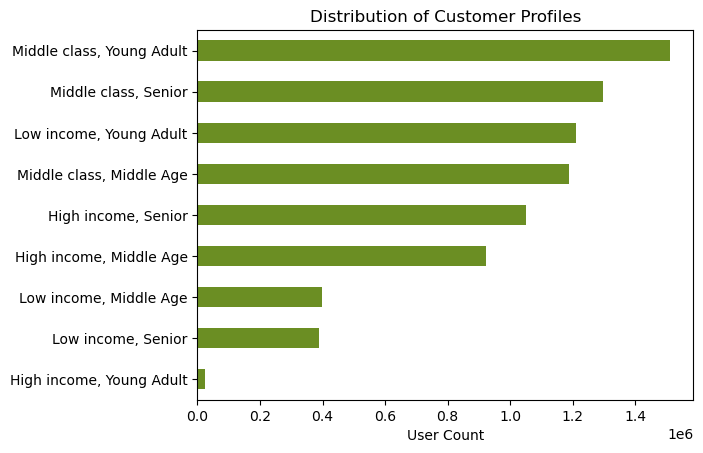

In [32]:
cus_profiles = ords_prods_active_cus['Customer Profile'].value_counts().sort_values(ascending = True).plot.barh(
    x='Number of Customers', 
    y='Customer Profiles', 
    title='Distribution of Customer Profiles', 
    color='olivedrab')
plt.xlabel('User Count')
plt.ylabel('')

In [74]:
# Exporting bar chart

cus_profiles.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_customer_profiles.png'), bbox_inches='tight')

### Question 7 - Customer profile statistics

In [34]:
# Order frequency by customer profile

order_freq_cus = ords_prods_active_cus.groupby('Customer Profile').agg({'order_frequency': ['mean', 'min', 'max']}).sort_values(by = ('order_frequency', 'mean'), ascending = False)
order_freq_cus

order_frequency           
                                     mean  min   max
Customer Profile                                    
Low income, Middle Age          13.689386  0.0  30.0
Low income, Senior              13.653999  0.0  30.0
Low income, Young Adult         13.160053  0.0  30.0
Middle class, Middle Age        12.907639  0.0  30.0
High income, Middle Age         12.864572  0.0  30.0
Middle class, Young Adult       12.840969  0.0  30.0
Middle class, Senior            12.836910  0.0  30.0
High income, Senior             12.799163  0.0  30.0
High income, Young Adult        12.321465  0.0  30.0

In [35]:
# Expenditure by customer profile

expend_freq_cus = ords_prods_active_cus.groupby('Customer Profile').agg({'prices': ['mean', 'min', 'max']}).sort_values(by = ('prices', 'mean'), ascending = False)
expend_freq_cus

prices              
                                 mean  min      max
Customer Profile                                   
High income, Young Adult   363.902322  1.0  99999.0
High income, Middle Age     20.119185  1.0  99999.0
High income, Senior         17.910373  1.0  99999.0
Middle class, Young Adult   10.151053  1.0  99999.0
Middle class, Middle Age     9.488263  1.0  99999.0
Middle class, Senior         9.371868  1.0  99999.0
Low income, Young Adult      7.535640  1.0     25.0
Low income, Middle Age       6.714183  1.0     25.0
Low income, Senior           6.608321  1.0     25.0

### Question 8 - Customer analysis by regions and departments

#### South 

In [37]:
# Create subset for South

south_customer = ords_prods_active_cus[ords_prods_active_cus['Region'] == 'South' ]

In [38]:
# Family status

south_customer['fam_status'].value_counts()

fam_status
married                             1870852
single                               436301
divorced/widowed                     227618
living with parents and siblings     130484
Name: count, dtype: int64

In [44]:
# Top 10 products

south_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    37986
Bag of Organic Bananas    25318
Organic Strawberries      21073
Organic Baby Spinach      19099
Organic Avocado           17235
Organic Hass Avocado      14580
Strawberries              11226
Large Lemon               11134
Limes                     11132
Organic Whole Milk         9263
Name: count, dtype: int64

In [45]:
# Most popular departments

south_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     751330
16    426567
19    232379
7     218352
1     202237
Name: count, dtype: int64

#### West

In [41]:
# Create subset for West

west_customer = ords_prods_active_cus[ords_prods_active_cus['Region'] == 'West']

In [42]:
# Family status

west_customer['fam_status'].value_counts()

fam_status
married                             1432501
single                               334820
divorced/widowed                     173454
living with parents and siblings      95212
Name: count, dtype: int64

In [43]:
# Top 10 goods by order

west_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    29212
Bag of Organic Bananas    19259
Organic Strawberries      15941
Organic Baby Spinach      14762
Organic Avocado           13125
Organic Hass Avocado      11300
Strawberries               8847
Large Lemon                8583
Limes                      8552
Organic Whole Milk         7177
Name: count, dtype: int64

In [46]:
# Most popular departments

west_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     572305
16    327628
19    178541
7     164450
1     154503
Name: count, dtype: int64

### Midwest

In [47]:
# Create subset for Midest

midwest_customer = ords_prods_active_cus[ords_prods_active_cus['Region'] == 'Midwest']

In [48]:
# Family status

midwest_customer['fam_status'].value_counts()

fam_status
married                             1327983
single                               307328
divorced/widowed                     161371
living with parents and siblings      90618
Name: count, dtype: int64

In [49]:
# Top 10 goods by order

midwest_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    26752
Bag of Organic Bananas    17901
Organic Strawberries      14629
Organic Baby Spinach      13505
Organic Avocado           12447
Organic Hass Avocado      10264
Strawberries               8215
Limes                      8109
Large Lemon                8106
Organic Whole Milk         6720
Name: count, dtype: int64

In [50]:
# Most popular departments

midwest_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     532086
16    302797
19    164567
7     153337
1     143100
Name: count, dtype: int64

#### Northeast

In [51]:
# Create subset for Midest

northeast_customer = ords_prods_active_cus[ords_prods_active_cus['Region'] == 'Northeast']

In [52]:
# Family status

northeast_customer['fam_status'].value_counts()

fam_status
married                             992108
single                              232694
divorced/widowed                    120824
living with parents and siblings     63253
Name: count, dtype: int64

In [53]:
# Top 10 goods by order

northeast_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    19947
Bag of Organic Bananas    13340
Organic Strawberries      11085
Organic Baby Spinach       9806
Organic Avocado            9281
Organic Hass Avocado       7782
Large Lemon                6179
Limes                      5873
Strawberries               5846
Organic Whole Milk         5112
Name: count, dtype: int64

In [54]:
# Most popular departments

northeast_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     396479
16    224964
19    124942
7     115554
1     107748
Name: count, dtype: int64

In [62]:
cus_by_region = pd.crosstab(ords_prods_active_cus['Customer Profile'], ords_prods_active_cus['Region'], dropna = False)

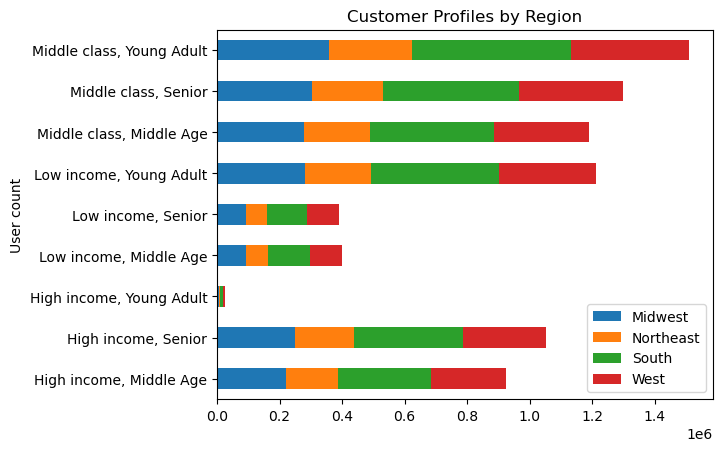

In [72]:
cus_by_region.sort_values(by='Customer Profile').plot(kind='barh', stacked=True)
plt.title('Customer Profiles by Region')
plt.xlabel('')
plt.ylabel('User count')
plt.legend(title=None)

In [75]:
ords_prods_active_cus.to_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'ords_prods_cus_2.pkl'))